In [0]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
import matplotlib.colors as colors

In [0]:
from itertools import cycle

def plotClustering(X, plt_labels):
    plt_colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

    plt_K = np.unique(plt_labels).size

    for k in range(-1, plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    
    plt.show()

In [0]:
def norm(X):
  nX = X[:,0]
  nY = X[:,1]
  nX = (nX - np.min(nX)) / (np.max(nX) - np.min(nX))
  nY = (nY - np.min(nY)) / (np.max(nY) - np.min(nY))
  return np.c_[nX, nY]

In [0]:
def stand(X):
  nX = X[:,0]
  nY = X[:,1]
  nX = (nX - nX.mean()) / nX.std()
  nY = (nY - nY.mean()) / nY.std()
  return np.c_[nX, nY]

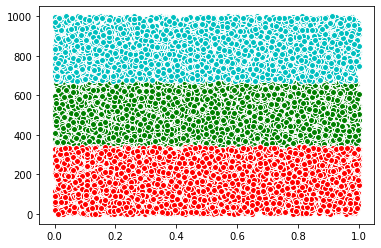

In [0]:
X = np.random.rand(10000,2) * np.array([1, 1000])

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)
plotClustering(X, k_means.labels_)

[0.70604897 0.37586908 0.82186131 ... 0.60419306 0.23000133 0.26049619]


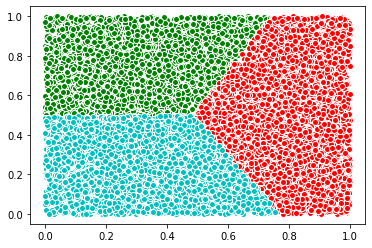

In [0]:
normal = norm(X)
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(normal)
plotClustering(normal, k_means.labels_)

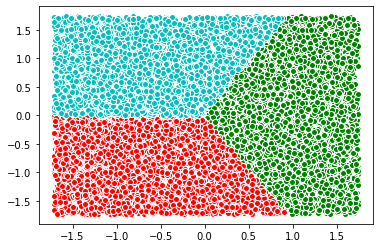

In [0]:
standard = stand(X)
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(standard)
plotClustering(standard, k_means.labels_)

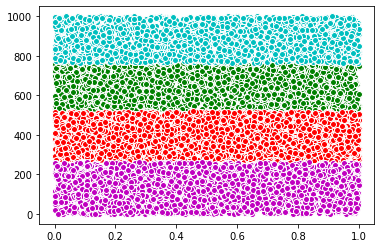

In [0]:
birch = Birch(threshold=100, n_clusters=None)
birch.fit(X)
plotClustering(X, birch.labels_)

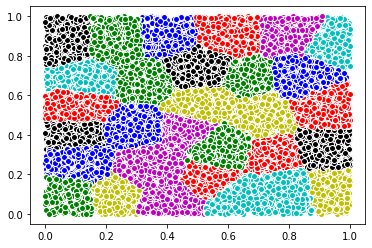

In [0]:
birch = Birch(threshold=0.1, n_clusters=None)
birch.fit(normal)
plotClustering(normal, birch.labels_)

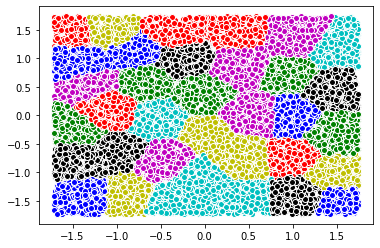

In [0]:
birch = Birch(threshold=0.3, n_clusters=None)
birch.fit(standard)
plotClustering(standard, birch.labels_)

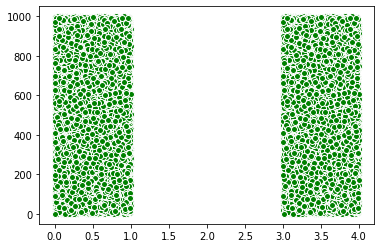

In [0]:
dbscan = DBSCAN(eps=3, min_samples=25)
Y = X+np.array([3,0])
Y = np.vstack((X, Y))
dbscan.fit(Y)
plotClustering(Y, dbscan.labels_)

[0.70604897 0.37586908 0.82186131 ... 0.60419306 0.23000133 0.26049619]


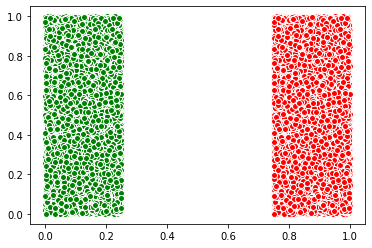

In [0]:
dbscan = DBSCAN(eps=0.5, min_samples=25)
dbnormal = norm(Y)
dbscan.fit(dbnormal)


plotClustering(dbnormal, dbscan.labels_)

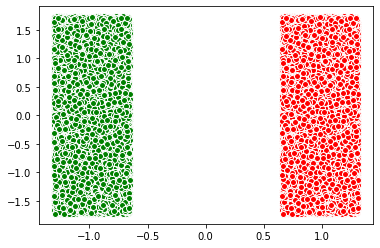

In [0]:
dbscan = DBSCAN(eps=0.5, min_samples=25)
dbstd = stand(Y)
dbscan.fit(dbstd)


plotClustering(dbstd, dbscan.labels_)